# SumNet Prediction with SARIMAX Model

This notebook demonstrates how to predict future SumNet values using the SARIMAX model, which is suitable for time series data with seasonality, trends, or external factors influencing the values. You can specify the number of years into the future for which you want predictions.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

# Load and display the data
data_path = '../data/random_daily_mock_sumnet_data.csv'
data = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')
df = pd.read_csv(data_path, parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.head()

,Year,Month,SumNet
Date,,,
2062-01-01,62,1,11861.663447
2062-01-02,62,1,28570.714886
2062-01-03,62,1,22227.824313
2062-01-04,62,1,18361.096042
2062-01-05,62,1,5524.540573


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data['SumNet'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()


C:\Users\weerakorn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\weerakorn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [32]:
# Predicting future values
years_into_future = int(input('Enter the number of years into the future you want predictions for: '))
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=(years_into_future * 12) + 1, freq='M')

#future_dates = [monthly_data.index[-1] + DateOffset(months=x) for x in range(1, 12*years_into_future + 1)]

forecast = results.predict(start=len(years_into_future), end=len(future_dates) + len(future_dates) - 1, dynamic=True)

forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['SumNet'])

In [37]:
# Filter predictions to only include the requested years
filtered_forecast = forecast_df

# Display the filtered forecast
print(filtered_forecast)


           SumNet
2064-12-31    NaN
2065-01-31    NaN
2065-02-28    NaN
2065-03-31    NaN
2065-04-30    NaN
...           ...
2069-08-31    NaN
2069-09-30    NaN
2069-10-31    NaN
2069-11-30    NaN
2069-12-31    NaN

[61 rows x 1 columns]


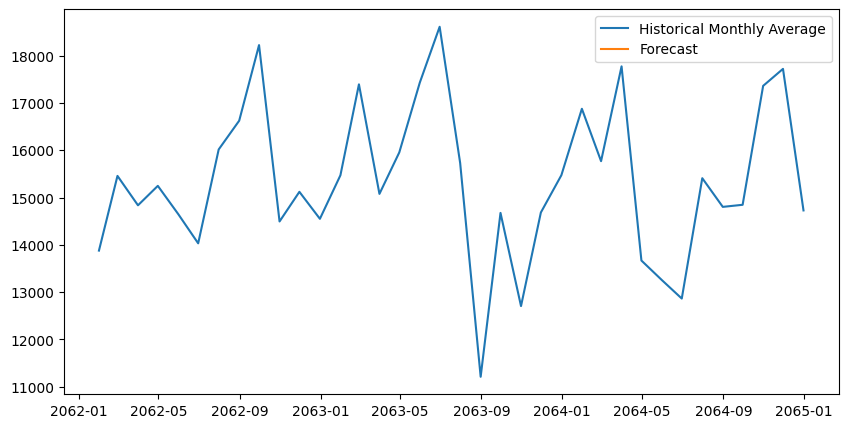

In [38]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(monthly_data.index, monthly_data['SumNet'], label='Historical Monthly Average')
plt.plot(forecast_df.index, forecast_df['SumNet'], label='Forecast')
plt.legend()
plt.show()